# Regresión lineal

Abordemos las primeras ideas de regresión lineal a través de un ejemplo práctico:

-  Creamos dos variables, Ingreso y Consumo Esperado

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.formula.api as stm
from statsmodels.graphics.regressionplots import abline_plot


df = pd.DataFrame({
    'Col1': [1,2,3],
    'Col2': [4,5,6]
    })


familia = pd.DataFrame({'Y':[55,60,65,70,75,
                        65,70,74,80,85,88,
                        79,84,90,94,98,
                        80,93,95,103,108,113,115,
                        102,107,110,116,118,125,
                        110,115,120,130,135,140,
                        120,136,140,144,145,
                        135,137,140,152,157,160,162,
                        137,145,155,165,175,189,
                        150,152,175,178,180,185,191
                        ],'X':[80,80,80,80,80,
                   100,100,100,100,100,100,
                   120,120,120,120,120,
                   140,140,140,140,140,140,140,
                   160,160,160,160,160,160,
                   180,180,180,180,180,180,
                   200,200,200,200,200,
                   220,220,220,220,220,220,220,
                   240,240,240,240,240,240,
                   260,260,260,260,260,260,260
                   ]})
familia.head()

,Y,X
0,55,80
1,60,80
2,65,80
3,70,80
4,75,80


In [3]:
ingresos = np.arange(80,261,20)
ingresos
consumoEsperado = [65,77,89,101,113,125,137,149,161,173]
consumoEsperado


familia.columns

Index(['Y', 'X'], dtype='object')

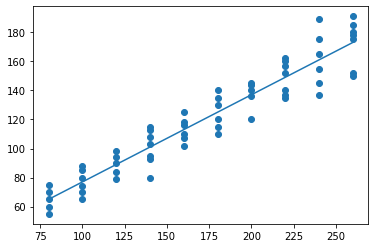

In [4]:
plt.figure() # llama al dispositivo grafico
plt.plot(ingresos,consumoEsperado)
plt.scatter(familia['X'],familia['Y'])
plt.show()

¿Qué hemos hecho?

$$ E(Y|X_i) = f(X_i)$$

$$E(Y|X_i) = \beta_1+\beta_2X_i$$

$$ u_i = Y_i - E(Y|X_i) $$

$$ Y_i = E(Y|X_i) + u_i$$


¿Qué significa que sea lineal?

El término regresión lineal siempre significará una regresión lineal en los parámetros; los $\beta$ (es decir, los parámetros) se elevan sólo a la primera potencia. Puede o no ser lineal en las variables explicativas $X$.

Para evidenciar la factibilidad del uso de RL en este caso, vamos a obtener una muestra de la población:

In [5]:
nS = familia.shape
type(nS)
indice = np.arange(0,nS[0])
indice # Creamos una variable indicadora para obtener una muestra

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [6]:
random.seed(8519)
muestra = random.sample(list(indice),k = 20) # cambio de array a lista
muestra # samos sample para obtener una muestra sin reemplazo del tamaño indicado

[54, 59, 33, 25, 32, 39, 47, 51, 18, 3, 34, 12, 29, 7, 26, 5, 56, 50, 44, 13]

In [7]:
ingreso_muestra = familia.loc[muestra,'X']
consumo_muestra = familia.loc[muestra,'Y']

In [8]:
df = pd.DataFrame(list(zip(consumo_muestra,ingreso_muestra)),columns = ['consumo_muestra','ingreso_muestra'])
ajuste_1 = stm.ols('consumo_muestra~ingreso_muestra',data =df).fit()

print(ajuste_1.summary())

                            OLS Regression Results                            
Dep. Variable:        consumo_muestra   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     179.4
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           8.44e-11
Time:                        20:23:47   Log-Likelihood:                -76.677
No. Observations:                  20   AIC:                             157.4
Df Residuals:                      18   BIC:                             159.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.2650      8.817     

Text(0, 0.5, 'Cellphone')

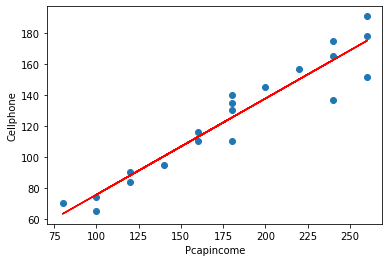

In [9]:
plt.figure()
plt.plot(df.ingreso_muestra,df.consumo_muestra,'o')
plt.plot(df.ingreso_muestra,ajuste_1.fittedvalues,'-',color='r')
plt.xlabel('Pcapincome')
plt.ylabel('Cellphone')


## Regresión: Paso a paso

La función poblacional sería:

$$
Y_i = \beta_1 + \beta_2X_i+u_i
$$

Como no es observable, se usa la muestral

$$
Y_i=\hat{\beta}_1+\hat{\beta}_2X_i+\hat{u}_i
$$


$$
Y_i=\hat{Y}_i+\hat{u}_i
$$


$$
\hat{u}_i = Y_i-\hat{Y}_i
$$


$$
\hat{u}_i = Y_i- \hat{\beta}_1-\hat{\beta}_2X_i
$$


Es por esto que los residuos se obtienen a través de los betas:


$$
\sum\hat{u}_i^2 =\sum (Y_i- \hat{\beta}_1-\hat{\beta}_2X_i)^2
$$


$$
\sum\hat{u}_i^2 =f(\hat{\beta}_1,\hat{\beta}_2)
$$


Diferenciando se obtiene:

$$
 \hat{\beta}_2 = \frac{S_{xy}}{S_{xx}}
$$

$$
 \hat\beta_1 = \bar{Y} -  \hat\beta_2\bar{X}
$$
donde 

$$
S_{xx} = \sum_{i=1}^{n}x_i^2-n\bar{x}^2
$$

$$
S_{xy} = \sum_{i=1}^{n}x_i y_i-n\bar{x}\bar{y}
$$


Abrimos la `tabla3.2`, vamos a obtener:

-  salario promedio por hora (Y) y 
-  los años de escolaridad (X).


In [10]:
consumo = pd.read_csv('https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/Tabla3_2.csv',
                      sep = ';',decimal = '.')


consumo.head()

,Y,X
0,70,80
1,65,100
2,90,120
3,95,140
4,110,160


In [11]:
media_x = np.mean(consumo['X'])
media_y = np.mean(consumo['Y'])


n = consumo.shape[0]

sumcuad_x = np.sum(consumo['X']*consumo['X'])
sum_xy = np.sum(consumo['X']*consumo['Y'])

beta_som = (sum_xy-n*media_x*media_y)/(sumcuad_x-n*(media_x**2))
alpha_som = media_y-beta_som*media_x
(alpha_som,beta_som)

(24.454545454545467, 0.509090909090909)

Verificamos lo anterior mediante:

In [12]:
reg_1 = stm.ols('Y~X',data = consumo)
print(reg_1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     202.9
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           5.75e-07
Time:                        20:23:48   Log-Likelihood:                -31.781
No. Observations:                  10   AIC:                             67.56
Df Residuals:                       8   BIC:                             68.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4545      6.414      3.813      0.0

/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Veamos cómo queda nuestra estimación:

In [13]:
y_ajustado = alpha_som+beta_som*consumo['X']

dfAux = pd.DataFrame(list(zip(consumo['X'],y_ajustado)),
                     columns = ['X','y_ajustado'])
dfAux

,X,y_ajustado
0,80,65.181818
1,100,75.363636
2,120,85.545455
3,140,95.727273
4,160,105.909091
5,180,116.090909
6,200,126.272727
7,220,136.454545
8,240,146.636364
9,260,156.818182


In [14]:
e = consumo['Y']-y_ajustado


dfAux = pd.DataFrame(list(zip(consumo['X'],consumo['Y'],y_ajustado,e)),
                     columns = ['X','Y','y_ajustado','e'])

dfAux

,X,Y,y_ajustado,e
0,80,70,65.181818,4.818182
1,100,65,75.363636,-10.363636
2,120,90,85.545455,4.454545
3,140,95,95.727273,-0.727273
4,160,110,105.909091,4.090909
5,180,115,116.090909,-1.090909
6,200,120,126.272727,-6.272727
7,220,140,136.454545,3.545455
8,240,155,146.636364,8.363636
9,260,150,156.818182,-6.818182


In [15]:
np.mean(e)
np.corrcoef(e,consumo['X'])

array([[1.00000000e+00, 1.13838806e-15],
       [1.13838806e-15, 1.00000000e+00]])

In [16]:
SCT = np.sum((consumo['Y']-media_y)**2)
SCE = np.sum((y_ajustado-media_y)**2)
SCR = np.sum(e**2)

R_2 = SCE/SCT
R_2


0.9620615604867568

In [17]:
print(reg_1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     202.9
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           5.75e-07
Time:                        20:23:48   Log-Likelihood:                -31.781
No. Observations:                  10   AIC:                             67.56
Df Residuals:                       8   BIC:                             68.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4545      6.414      3.813      0.0

/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Otro ejemplo

$$
H_0:\beta_2=0
$$
$$
H_1:\beta_2\neq 0
$$

In [18]:
uu = 'https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/table2_8.csv'

datos = pd.read_csv(uu,sep = ';')
datos.shape
datos.columns
m1 = stm.ols('FOODEXP~TOTALEXP',data = datos)
print(m1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                FOODEXP   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     31.10
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           8.45e-07
Time:                        20:23:48   Log-Likelihood:                -308.16
No. Observations:                  55   AIC:                             620.3
Df Residuals:                      53   BIC:                             624.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.2088     50.856      1.852      0.0

Regresamos el gasto total en el gasto en alimentos

¿Son los coeficientes diferentes de cero?

In [19]:
import scipy.stats as st


t_ho = 0
t1 = (0.4368-t_ho)/ 0.078
(1-st.t.cdf(t1,df = 53))



3.8888077047438685e-07

In [20]:

t_ho = 0.3
t1 = (0.4368-t_ho)/ 0.078
(1-st.t.cdf(np.abs(t1),df = 53))

0.04261898819196597

Interpretación de los coeficientes

-  El coeficiente de la variable dependiente mide la tasa de cambio (derivada=pendiente) del modelo
-  La interpretación suele ser *En promedio, el aumento de una unidad en la variable independiente produce un aumento/disminución de $\beta_i$ cantidad en la variable dependiente*
-  Interprete la regresión anterior.

### Práctica: Paridad del poder de compra

In [21]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/Tabla5_9.csv"

datos = pd.read_csv(uu,sep = ';')
datos.head()

,COUNTRY,BMACLC,BMAC$,EXCH,PPP,LOCALC
0,United States,2.54,2.54,-99999.00,-99999.00,-99999
1,Argentina,2.50,2.50,1.00,0.98,-40
2,Australia,3.00,1.52,1.98,1.18,-35
3,Brazil,3.60,1.64,2.19,1.42,-31
4,Britain,1.99,2.85,1.43,1.28,12


In [22]:
datos['EXCH'] = datos.EXCH.replace(to_replace= -99999, value=np.nan)
datos['PPP'] = datos.PPP.replace(to_replace = -99999, value = np.nan)
datos['LOCALC'] = datos.LOCALC.replace(to_replace= -99999, value = np.nan)

datos.head()

,COUNTRY,BMACLC,BMAC$,EXCH,PPP,LOCALC
0,United States,2.54,2.54,NaN,NaN,NaN
1,Argentina,2.50,2.50,1.00,0.98,-40.0
2,Australia,3.00,1.52,1.98,1.18,-35.0
3,Brazil,3.60,1.64,2.19,1.42,-31.0
4,Britain,1.99,2.85,1.43,1.28,12.0


Regresamos la paridad del poder de compra en la tasa de cambio

In [23]:
reg1 = stm.ols('EXCH~PPP',data = datos)
print(reg1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   EXCH   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2066.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           8.80e-28
Time:                        20:23:48   Log-Likelihood:                -205.44
No. Observations:                  30   AIC:                             414.9
Df Residuals:                      28   BIC:                             417.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -61.3889     44.987     -1.365      0.1

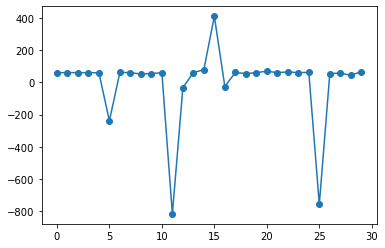

In [24]:
plt.figure()
plt.plot(np.arange(0,30),reg1.fit().resid,'-o')

In [25]:
reg3 = stm.ols('np.log(EXCH)~np.log(PPP)',data = datos)
print(reg3.fit().summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(EXCH)   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1655.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           1.87e-26
Time:                        20:23:48   Log-Likelihood:                -7.4056
No. Observations:                  30   AIC:                             18.81
Df Residuals:                      28   BIC:                             21.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3436      0.086      3.990      

La PPA sostiene que con una unidad de moneda debe ser posible comprar la misma canasta de bienes en todos los países.

### Práctica: Sueño

In [26]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/sleep75.csv"

datos = pd.read_csv(uu,sep = ",",header=None)
datos.columns
datos.columns = ["age","black","case","clerical","construc","educ","earns74","gdhlth","inlf", "leis1", "leis2", "leis3", "smsa", "lhrwage", "lothinc", "male", "marr", "prot", "rlxall", "selfe", "sleep", "slpnaps", "south", "spsepay", "spwrk75", "totwrk" , "union" , "worknrm" , "workscnd", "exper" , "yngkid","yrsmarr", "hrwage", "agesq"]

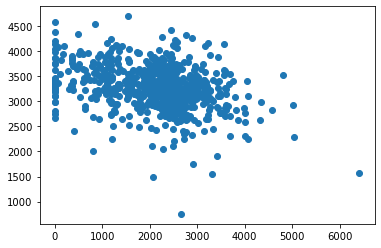

In [27]:
#totwrk: minutos trabajados por semana
# sleep: minutos dormidos por semana
plt.figure()
plt.scatter(datos['totwrk'],datos['sleep'])

In [28]:
dormir = stm.ols('sleep~totwrk',data = datos)
print(dormir.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     81.09
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           1.99e-18
Time:                        20:23:49   Log-Likelihood:                -5267.1
No. Observations:                 706   AIC:                         1.054e+04
Df Residuals:                     704   BIC:                         1.055e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3586.3770     38.912     92.165      0.0

Para acceder a elementos de la estimación

In [29]:
print(dormir.fit().bse)
print(dormir.fit().params)

Intercept    38.912427
totwrk        0.016740
dtype: float64
Intercept    3586.376952
totwrk         -0.150746
dtype: float64


Intervalo de confianza para $\beta_2$ y veamos los residuos

In [30]:
dormir.fit().params[1]+(-2*dormir.fit().bse[1],2*dormir.fit().bse[1])

array([-0.18422633, -0.11726532])

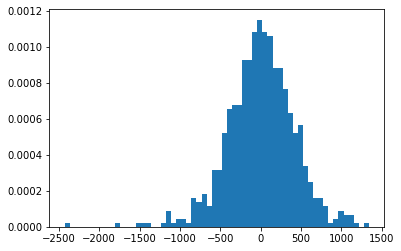

In [31]:
plt.figure()
plt.hist(dormir.fit().resid,bins = 60,density = True);

## Transformaciones lineales

In [32]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/Table%2031_3.csv"

datos = pd.read_csv(uu, sep =';')

reg_1 = stm.ols('Cellphone~Pcapincome',data = datos)
print(reg_1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:              Cellphone   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     53.67
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           2.50e-08
Time:                        20:23:49   Log-Likelihood:                -148.94
No. Observations:                  34   AIC:                             301.9
Df Residuals:                      32   BIC:                             304.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4795      6.109      2.043      0.0

Text(0, 0.5, 'Cellphone')

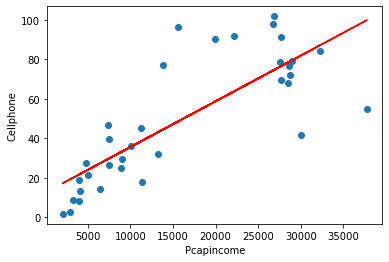

In [33]:
plt.figure()
plt.plot(datos.Pcapincome,datos.Cellphone,'o')
plt.plot(datos.Pcapincome,reg_1.fit().fittedvalues,'-',color='r')
plt.xlabel('Pcapincome')
plt.ylabel('Cellphone')

### Modelo reciproco

In [34]:
uu =  "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/tabla_6_4.csv"
datos = pd.read_csv(uu,sep = ';')
datos.describe()

,CM,FLR,PGNP,TFR
count,64.000000,64.000000,64.000000,64.000000
mean,141.500000,51.187500,1401.250000,5.549687
std,75.978067,26.007859,2725.695775,1.508993
min,12.000000,9.000000,120.000000,1.690000
25%,82.000000,29.000000,300.000000,4.607500
50%,138.500000,48.000000,620.000000,6.040000
75%,192.500000,77.250000,1317.500000,6.615000
max,312.000000,95.000000,19830.000000,8.490000


Text(0, 0.5, 'CM')

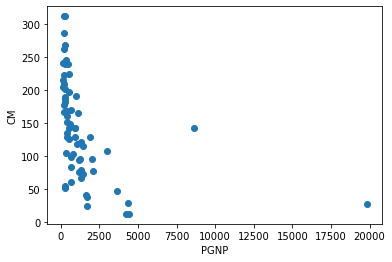

In [35]:
plt.figure()
plt.plot(datos.PGNP,datos.CM,'o')
plt.xlabel('PGNP')
plt.ylabel('CM')

In [36]:
reg1 = stm.ols('CM~PGNP',data = datos)
print(reg1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     12.36
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           0.000826
Time:                        20:23:50   Log-Likelihood:                -361.64
No. Observations:                  64   AIC:                             727.3
Df Residuals:                      62   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.4244      9.846     15.989      0.0

In [37]:
datos['RepPGNP'] = 1/datos.PGNP

reg2 = stm.ols('CM~RepPGNP',data = datos)
print(reg2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     52.61
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           7.82e-10
Time:                        20:23:50   Log-Likelihood:                -347.79
No. Observations:                  64   AIC:                             699.6
Df Residuals:                      62   BIC:                             703.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.7944     10.832      7.551      0.0

### Modelo log-lineal

In [38]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/ceosal2.csv"

datos = pd.read_csv(uu,header = None)
datos.columns = ["salary", "age", "college", "grad", "comten", "ceoten", "sales", "profits","mktval", "lsalary", "lsales", "lmktval", "comtensq", "ceotensq", "profmarg"]
datos.head()


reg1 = stm.ols('lsalary~ceoten',data = datos)
print(reg1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.334
Date:                Fri, 23 Jun 2023   Prob (F-statistic):              0.128
Time:                        20:23:50   Log-Likelihood:                -160.84
No. Observations:                 177   AIC:                             325.7
Df Residuals:                     175   BIC:                             332.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5055      0.068     95.682      0.0

### Regresión a través del origen

In [39]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/Table%206_1.csv"
datos = pd.read_csv(uu,sep = ';')
datos.head()


lmod1 = stm.ols('Y~ -1+X',data = datos)
print(lmod1.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.502
Model:                            OLS   Adj. R-squared (uncentered):              0.500
Method:                 Least Squares   F-statistic:                              241.2
Date:                Fri, 23 Jun 2023   Prob (F-statistic):                    4.41e-38
Time:                        20:23:50   Log-Likelihood:                         -751.30
No. Observations:                 240   AIC:                                      1505.
Df Residuals:                     239   BIC:                                      1508.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Regresión Lineal Múltiple

In [40]:
uu =  "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/hprice1.csv"
datos = pd.read_csv(uu,header=None)
datos.columns = ["price"   ,  "assess"  , 
                 "bdrms"  ,   "lotsize"  ,
                 "sqrft"   ,  "colonial",
                 "lprice"  ,  "lassess" ,
                 "llotsize" , "lsqrft"]

datos.describe()


,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,293.546034,315.736364,3.568182,9019.863636,2013.693182,0.693182,5.633180,5.717994,8.905105,7.572610
std,102.713445,95.314437,0.841393,10174.150414,577.191583,0.463816,0.303573,0.262113,0.544060,0.258688
min,111.000000,198.700000,2.000000,1000.000000,1171.000000,0.000000,4.709530,5.291796,6.907755,7.065613
25%,230.000000,253.900000,3.000000,5732.750000,1660.500000,0.000000,5.438079,5.536940,8.653908,7.414873
50%,265.500000,290.200000,3.000000,6430.000000,1845.000000,1.000000,5.581613,5.670566,8.768719,7.520231
75%,326.250000,352.125000,4.000000,8583.250000,2227.000000,1.000000,5.787642,5.863982,9.057567,7.708266
max,725.000000,708.600000,7.000000,92681.000000,3880.000000,1.000000,6.586172,6.563291,11.436920,8.263591


In [41]:

modelo1 = stm.ols('lprice~lassess+llotsize+lsqrft+bdrms',data = datos)
print(modelo1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     70.58
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           6.45e-26
Time:                        20:23:50   Log-Likelihood:                 45.750
No. Observations:                  88   AIC:                            -81.50
Df Residuals:                      83   BIC:                            -69.11
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2637      0.570      0.463      0.6

In [42]:
modelo2 = stm.ols('lprice~llotsize+lsqrft+bdrms',data = datos)
print(modelo2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           9.74e-19
Time:                        20:23:50   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2970      0.651     -1.992      0.0

In [43]:
modelo3 = stm.ols('lprice~bdrms',data = datos)
print(modelo3.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     23.53
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           5.43e-06
Time:                        20:23:51   Log-Likelihood:                -8.8147
No. Observations:                  88   AIC:                             21.63
Df Residuals:                      86   BIC:                             26.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0365      0.126     39.862      0.0

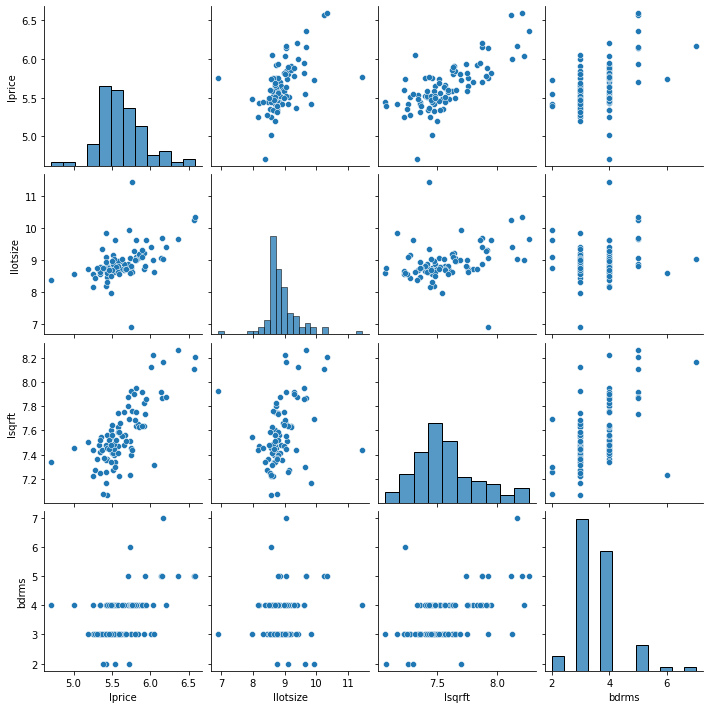

In [44]:
import seaborn as sns

sns.pairplot(datos.loc[:,['lprice','llotsize' , 'lsqrft' , 'bdrms']])

### Predicción

In [45]:
datos_nuevos = pd.DataFrame({'llotsize':np.log(2100),'lsqrft':np.log(8000),'bdrms':4},index = [0])

pred_vals = modelo2.fit().predict()
modelo2.fit().get_prediction().summary_frame().head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,5.776577,0.029185,5.718541,5.834614,5.404916,6.148239
1,5.707740,0.029306,5.649463,5.766018,5.336041,6.079440
2,5.310543,0.033384,5.244156,5.376930,4.937486,5.683600
3,5.326681,0.031818,5.263407,5.389955,4.954165,5.699197
4,5.797220,0.031014,5.735544,5.858895,5.424972,6.169467


In [46]:
pred_vals = modelo2.fit().get_prediction(datos_nuevos)
pred_vals.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,6.428811,0.147975,6.134546,6.723076,5.958326,6.899296


### RLM: Educación con insumos

In [47]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/gpa1.csv"
datosgpa = pd.read_csv(uu, header = None)
datosgpa.columns = ["age",  "soph",  "junior",    "senior",    "senior5",  "male", "campus",   "business", "engineer", "colGPA",   "hsGPA",    "ACT",  "job19",    "job20",    "drive",    "bike", "walk", "voluntr",  "PC",   "greek",    "car",  "siblings", "bgfriend", "clubs",    "skipped",  "alcohol",  "gradMI",   "fathcoll", "mothcoll"]

reg4 = stm.ols('colGPA ~ PC', data = datosgpa)
print(reg4.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     7.314
Date:                Fri, 23 Jun 2023   Prob (F-statistic):            0.00770
Time:                        20:23:53   Log-Likelihood:                -56.641
No. Observations:                 141   AIC:                             117.3
Df Residuals:                     139   BIC:                             123.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9894      0.040     75.678      0.0

In [48]:
reg5 = stm.ols('colGPA ~ PC + hsGPA + ACT', data = datosgpa)
print(reg5.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     12.83
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           1.93e-07
Time:                        20:23:53   Log-Likelihood:                -42.796
No. Observations:                 141   AIC:                             93.59
Df Residuals:                     137   BIC:                             105.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2635      0.333      3.793      0.0